In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/Mohan/Desktop/Data Sets")

In [3]:
train_data = pd.read_csv("train1.csv")
test_data = pd.read_csv("test1.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print(train_data.shape)
print(test_data.shape)
print(sample_submission.shape)

(22750, 9)
(12250, 8)
(12250, 2)


In [4]:
train_data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [6]:
train_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


Employee ID	- Unique Id of the employee

Date of Joining -Date on which the employee joined the company

Gender-Gender of the employee

Company Type - Type of company eg: Service based, product based etc.

WFH Setup - Available	Whether proper work from home setup is available or not 

Designation -Seniority level of the employee in codes

Resource Allocation -Hours allocated per day

Mental Fatigue Score - Stress rating provided by employees

Burn Rate -	Rate of saturation or burn out rate

In [5]:
# Null Values in training set
null_values = train_data.isnull().sum()
pd.DataFrame({"Null_Values": null_values,"Percentage" : np.round((100*null_values)/len(train_data),2)}).tail(3)

,Null_Values,Percentage
Resource Allocation,1381,6.07
Mental Fatigue Score,2117,9.31
Burn Rate,1124,4.94


Burn Rate is our Target column and it has 1124 null values

In [6]:
# Null Values in test set
null_values = test_data.isnull().sum()
pd.DataFrame({"Null_Values": null_values,"Percentage" : np.round((100*null_values)/len(test_data))}).tail(3)

,Null_Values,Percentage
Designation,0,0.0
Resource Allocation,0,0.0
Mental Fatigue Score,0,0.0


There is no record of null value in Test Data

In [7]:
# Remove records that contains null values in Target column
train_data.dropna(axis=0,inplace=True, how='all', subset= ["Burn Rate"])
# Null Values in training set after removing null value records of Target column
null_values = train_data.isnull().sum()
pd.DataFrame({"Null_Values": null_values,"Percentage" : np.round((100*null_values)/len(train_data),2)}).tail(3)

,Null_Values,Percentage
Resource Allocation,1278,5.91
Mental Fatigue Score,1945,8.99
Burn Rate,0,0.00


In [8]:
# Lets Check unique values in Resources Allocation and Mental Fatigue Score
print("Unique Values in Resource Allocation", sorted(train_data["Resource Allocation"].unique()), "\n")
print("Unique Values in Mental Fatigue Score", sorted(train_data["Mental Fatigue Score"].unique()))

Unique Values in Resource Allocation [1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 

Unique Values in Mental Fatigue Score [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.9, nan, 7.8, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]


Coorelation value between Resource Allocation and Mental Fatique :  0.7995632228418685


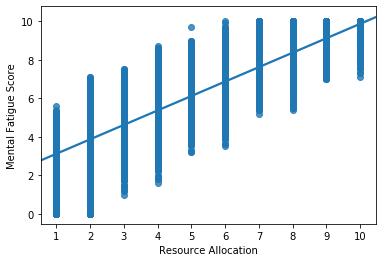

In [8]:
# Coorelation between Resource Allocation and Mental Fatigue
print("Coorelation value between Resource Allocation and Mental Fatique : ",train_data['Resource Allocation'].corr(train_data["Mental Fatigue Score"]))
_ = sns.regplot(x = train_data["Resource Allocation"], y= train_data["Mental Fatigue Score"])
plt.xticks(np.arange(1,11))
plt.show()

In [9]:
# Fill null values in Mental Fatigue Score according to the mode value
dict_1 = dict(train_data.groupby("Resource Allocation")["Mental Fatigue Score"].median())
train_data["Mental Fatigue Score"] = train_data["Mental Fatigue Score"].fillna(value=train_data["Resource Allocation"].apply(lambda x : dict_1.get(x)))

dict_2 = dict(train_data.groupby("Mental Fatigue Score")["Resource Allocation"].median())
train_data["Resource Allocation"] = train_data["Resource Allocation"].fillna(value=train_data["Mental Fatigue Score"].apply(lambda x : dict_2.get(x)))

train_data["Resource Allocation"] = train_data["Resource Allocation"].fillna(value=train_data["Resource Allocation"].mode())
train_data["Mental Fatigue Score"] = train_data["Mental Fatigue Score"].fillna(value=train_data["Mental Fatigue Score"].mode())

In [10]:
train_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [11]:
train_data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [12]:
# Employee ID
print("Unique Employee ID in training set ", train_data["Employee ID"].nunique())
print("Unique Employee ID in training set ",test_data["Employee ID"].nunique())
# Checking whether any record of Employee of training set exist in test set
print(len(train_data[train_data["Employee ID"].isin(test_data["Employee ID"])== True]))

Unique Employee ID in training set  21626
Unique Employee ID in training set  12250
0


In [13]:
# Date of Joining
train_data["Date of Joining"] = pd.to_datetime(train_data["Date of Joining"])
test_data["Date of Joining"] = pd.to_datetime(test_data["Date of Joining"])

train_data["Month"] = train_data["Date of Joining"].dt.month
test_data["Month"] = test_data["Date of Joining"].dt.month

train_data.drop(labels=["Date of Joining"], axis=1, inplace=True)
test_data.drop(labels=["Date of Joining"], axis=1, inplace=True)

In [14]:
# Gender
print("Unique Values in gender column in training set" , train_data["Gender"].unique())
print("Unique Values in gender column in Test Set",test_data["Gender"].unique())

train_data["Gender"].replace({'Female':0,'Male':1}, inplace=True)
test_data["Gender"].replace({'Female':0,'Male':1}, inplace=True)

Unique Values in gender column in training set ['Female' 'Male']
Unique Values in gender column in Test Set ['Female' 'Male']


In [15]:
# Company Type
print("Unique Values in company_type column in training set" , train_data["Company Type"].unique())
print("Unique Values in company_type column in Test Set",test_data["Company Type"].unique())

train_data["Company Type"].replace({'Service':0,'Product':1}, inplace=True)
test_data["Company Type"].replace({'Service':0,'Product':1}, inplace=True)

Unique Values in company_type column in training set ['Service' 'Product']
Unique Values in company_type column in Test Set ['Service' 'Product']


In [16]:
# WFH Setup Available
print("Unique Values in WFH column in training set" , train_data["WFH Setup Available"].unique())
print("Unique Values in WFH column in Test Set",test_data["WFH Setup Available"].unique())

train_data["WFH Setup Available"].replace({'No':0,'Yes':1}, inplace=True)
test_data["WFH Setup Available"].replace({'No':0,'Yes':1}, inplace=True)

Unique Values in WFH column in training set ['No' 'Yes']
Unique Values in WFH column in Test Set ['No' 'Yes']


In [17]:
train_data.dtypes

Employee ID              object
Gender                    int64
Company Type              int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Month                     int64
dtype: object

In [18]:
# train_data["AVG_WORKING_HOUR_AS_PER_DESIGNATION"] = train_data[""]
train_data["Designation"] = train_data["Designation"].astype(np.int32)
test_data["Designation"] = test_data["Designation"].astype(np.int32)

In [19]:
# Making feature and Target Column Split
X_train = train_data.drop(labels=["Employee ID", "Burn Rate","Month"], axis=1)
X_test = test_data.drop(labels=["Employee ID","Month"], axis=1)
y_train = train_data["Burn Rate"]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(21626, 6)
(12250, 6)
(21626,)


In [22]:
!pip install catboost

## CAT BOOST

In [23]:
from catboost import CatBoostRegressor
cat_boost = CatBoostRegressor(iterations=500, learning_rate=0.0522, random_state=101, max_depth=7,colsample_bylevel=1)
cat_boost.fit(X_train, y_train)

y_pred_train = cat_boost.predict(X_train)
y_pred_test = cat_boost.predict(X_test)
print("Prediction on training set ", 100*r2_score(y_train, y_pred_train))

0:	learn: 0.1897227	total: 139ms	remaining: 1m 9s
1:	learn: 0.1814798	total: 143ms	remaining: 35.7s
2:	learn: 0.1738269	total: 147ms	remaining: 24.4s
3:	learn: 0.1664920	total: 151ms	remaining: 18.7s
4:	learn: 0.1596600	total: 156ms	remaining: 15.4s
5:	learn: 0.1533293	total: 160ms	remaining: 13.2s
6:	learn: 0.1473062	total: 163ms	remaining: 11.5s
7:	learn: 0.1416732	total: 167ms	remaining: 10.3s
8:	learn: 0.1363480	total: 171ms	remaining: 9.32s
9:	learn: 0.1312454	total: 175ms	remaining: 8.55s
10:	learn: 0.1264332	total: 178ms	remaining: 7.92s
11:	learn: 0.1218989	total: 183ms	remaining: 7.42s
12:	learn: 0.1177423	total: 187ms	remaining: 6.99s
13:	learn: 0.1136378	total: 191ms	remaining: 6.64s
14:	learn: 0.1099329	total: 195ms	remaining: 6.32s
15:	learn: 0.1064316	total: 199ms	remaining: 6.02s
16:	learn: 0.1033886	total: 203ms	remaining: 5.76s
17:	learn: 0.1003585	total: 206ms	remaining: 5.52s
18:	learn: 0.0973858	total: 210ms	remaining: 5.31s
19:	learn: 0.0946454	total: 213ms	remaini

170:	learn: 0.0587069	total: 996ms	remaining: 1.92s
171:	learn: 0.0587015	total: 1.01s	remaining: 1.92s
172:	learn: 0.0586867	total: 1.02s	remaining: 1.93s
173:	learn: 0.0586797	total: 1.03s	remaining: 1.94s
174:	learn: 0.0586714	total: 1.04s	remaining: 1.94s
175:	learn: 0.0586671	total: 1.05s	remaining: 1.94s
176:	learn: 0.0586561	total: 1.06s	remaining: 1.94s
177:	learn: 0.0586529	total: 1.07s	remaining: 1.94s
178:	learn: 0.0586452	total: 1.08s	remaining: 1.93s
179:	learn: 0.0586376	total: 1.08s	remaining: 1.93s
180:	learn: 0.0586321	total: 1.09s	remaining: 1.93s
181:	learn: 0.0586208	total: 1.11s	remaining: 1.93s
182:	learn: 0.0586130	total: 1.11s	remaining: 1.93s
183:	learn: 0.0586093	total: 1.12s	remaining: 1.92s
184:	learn: 0.0586011	total: 1.13s	remaining: 1.92s
185:	learn: 0.0585977	total: 1.13s	remaining: 1.92s
186:	learn: 0.0585876	total: 1.14s	remaining: 1.91s
187:	learn: 0.0585810	total: 1.15s	remaining: 1.91s
188:	learn: 0.0585767	total: 1.15s	remaining: 1.9s
189:	learn: 0

357:	learn: 0.0577337	total: 2.08s	remaining: 824ms
358:	learn: 0.0577318	total: 2.08s	remaining: 817ms
359:	learn: 0.0577237	total: 2.09s	remaining: 812ms
360:	learn: 0.0577197	total: 2.09s	remaining: 806ms
361:	learn: 0.0577175	total: 2.1s	remaining: 799ms
362:	learn: 0.0577145	total: 2.1s	remaining: 793ms
363:	learn: 0.0577132	total: 2.11s	remaining: 787ms
364:	learn: 0.0577119	total: 2.11s	remaining: 780ms
365:	learn: 0.0577080	total: 2.11s	remaining: 774ms
366:	learn: 0.0577060	total: 2.12s	remaining: 767ms
367:	learn: 0.0577019	total: 2.12s	remaining: 761ms
368:	learn: 0.0576997	total: 2.13s	remaining: 755ms
369:	learn: 0.0576962	total: 2.13s	remaining: 748ms
370:	learn: 0.0576936	total: 2.13s	remaining: 742ms
371:	learn: 0.0576902	total: 2.14s	remaining: 736ms
372:	learn: 0.0576863	total: 2.14s	remaining: 729ms
373:	learn: 0.0576838	total: 2.15s	remaining: 723ms
374:	learn: 0.0576801	total: 2.15s	remaining: 716ms
375:	learn: 0.0576784	total: 2.15s	remaining: 710ms
376:	learn: 0.

In [21]:
sample_submission["Employee ID"] = test_data["Employee ID"]
sample_submission["Burn Rate"] = y_pred_test
sample_submission.to_csv("sample_submission.csv", index=False)

Test Set Accuracy - 93.07022